<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Евгений! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Цель исследования: обучить модель классифицировать комментарии на позитивные и негативные, основываясь на наборе данных с разметкой о токсичности правок.

Необходимо построить модель со значением метрики качества *F1* не меньше 0.75. 

## Подготовка

In [1]:
# импорт библиотек

import os
import re

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet, stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
# чтение файла с разных источников

pth1 = '/datasets/toxic_comments.csv'
pth2 = 'toxic_comments.csv'

if os.path.exists(pth1):
    comments = pd.read_csv(pth1, index_col=0)
    
elif os.path.exists(pth2):
    comments = pd.read_csv(pth2, index_col=0)
    
else:
    print('Файл не найден') 

In [3]:
# знакомство с данными
comments.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
 # информация о пропусках
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [5]:
# проверка на дубликаты
comments.duplicated().sum()

0

In [6]:
# функция очитски текста от всех символов, кроме английских букв и апострофа 
def clear_text(text):
    text_clear = re.sub(r"[^a-zA-Z' ]", ' ', text)
    text_clear = text_clear.split()
    text_clear = ' '.join(text_clear)
    return text_clear  

In [7]:
# очистка от лишних символов столбца с твитами
comments['text'] = comments['text'].apply(lambda x: clear_text(x))
comments.head()

,text,toxic
0,Explanation Why the edits made under my userna...,0
1,D'aww He matches this background colour I'm se...,0
2,Hey man I'm really not trying to edit war It's...,0
3,More I can't make any real suggestions on impr...,0
4,You sir are my hero Any chance you remember wh...,0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [8]:
# функция лемматизации
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """
    Определяет тэг, какой частью речи является слово   
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemm_english(sentence):
    """
    Лемматизирует набор слов   
    """
    words = nltk.word_tokenize(sentence)
    
    lemm_sentence = []
    
    for w in words:
        lemm_word = lemmatizer.lemmatize(w, get_wordnet_pos(w))
        lemm_sentence.append(lemm_word)
    return ' '.join(lemm_sentence).lower()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
🔥</div>

In [9]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
%%time
# лемматизация столбца с твитами
# время выполнения кода 16 мин
comments['lemm_text'] = comments['text'].apply(lambda x: lemm_english(x))
comments

CPU times: user 17min 2s, sys: 1min 40s, total: 18min 42s
Wall time: 18min 42s


,text,toxic,lemm_text
0,Explanation Why the edits made under my userna...,0,explanation why the edits make under my userna...
1,D'aww He matches this background colour I'm se...,0,d'aww he match this background colour i 'm see...
2,Hey man I'm really not trying to edit war It's...,0,hey man i 'm really not try to edit war it 's ...
3,More I can't make any real suggestions on impr...,0,more i ca n't make any real suggestion on impr...
4,You sir are my hero Any chance you remember wh...,0,you sir be my hero any chance you remember wha...
...,...,...,...
159446,And for the second time of asking when your vi...,0,and for the second time of ask when your view ...
159447,You should be ashamed of yourself That is a ho...,0,you should be ashamed of yourself that be a ho...
159448,Spitzer Umm theres no actual article for prost...,0,spitzer umm there no actual article for prosti...
159449,And it looks like it was actually you who put ...,0,and it look like it be actually you who put on...


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
🔥Лемматизация проведена абсолютно корректно</div>

In [11]:
# переиндексация данных
comments.reset_index(drop=True, inplace=True)
comments.head()

,text,toxic,lemm_text
0,Explanation Why the edits made under my userna...,0,explanation why the edits make under my userna...
1,D'aww He matches this background colour I'm se...,0,d'aww he match this background colour i 'm see...
2,Hey man I'm really not trying to edit war It's...,0,hey man i 'm really not try to edit war it 's ...
3,More I can't make any real suggestions on impr...,0,more i ca n't make any real suggestion on impr...
4,You sir are my hero Any chance you remember wh...,0,you sir be my hero any chance you remember wha...


In [12]:
# выделение стобца признаков и целевого признака
features = comments['lemm_text']
target = comments['toxic']

In [13]:
# баланс классов в целевом признаке
target.value_counts(normalize=True)

0    0.898388
1    0.101612
Name: toxic, dtype: float64

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, исследован баланс классов. Это важная информация для задачи классификации.</div>

In [14]:
# разделение данных на обучающую и тестово-валидационную выборки
features_train, features_testval, target_train, target_testval = train_test_split(
    features, target, test_size=0.2, random_state=12345)

In [15]:
# размерность и доли классов в обучающей выборке
print(features_train.shape)
print(target_train.shape)
print(target_train.value_counts(normalize=True))

(127433,)
(127433,)
0    0.898331
1    0.101669
Name: toxic, dtype: float64


In [16]:
# разделение данных на валидационную и тестовую выборки
features_val, features_test, target_val, target_test = train_test_split(
    features_testval, target_testval, test_size=0.5, random_state=12345)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
Данные разделены на выборки. Но я бы посоветовал тебе изменить пропорции и выделить на тест 10%. Причина простая - модели, которые мы обучаем чувствительны к объему обучающих данных. Чем больше слов они увидят в процессе обучения, и оценят их вклад в "токсичность", тем лучше будут модели. А для корректного тестирования и 10% данных вполне достаточно, учитывая немаленький размер датасета.

    
А чтобы не переживать за баланс классов после разделения, используй stratify=True    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет, Дмитрий! Спасибо за проверку и советы. Сейчас немного исправил пропорции обучающая-валидационная-тестовая на 80-10-10 (было 50-35-15). Баланс классов, в общем-то, не меняется.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 


</div>

In [17]:
# размерность и доли классов в валидационной выборке
print(features_val.shape)
print(target_val.shape)
print(target_val.value_counts(normalize=True))

(15929,)
(15929,)
0    0.899115
1    0.100885
Name: toxic, dtype: float64


In [18]:
# размерность и доли классов в тестовой выборке
print(features_test.shape)
print(target_test.shape)
print(target_test.value_counts(normalize=True))

(15930,)
(15930,)
0    0.898117
1    0.101883
Name: toxic, dtype: float64


In [19]:
# загрузка стоп-слов
nltk.download('stopwords')
stoplist = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# инициализация TF-IDF, подсчёт TF-IDF для обучающей и валидационной выборок
count_tf_idf = TfidfVectorizer(stop_words=stoplist)
tf_idf_train = count_tf_idf.fit_transform(features_train)
tf_idf_val = count_tf_idf.transform(features_val)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Нет смысла менять кодировку. Изменение кодировки увеличивает количество оперативной памяти, необходимой для хранения текстов. Но наши тексты написаны латиницей, поэтому вполне достаточно кодировки по умолчанию.</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Убрал кодировку. А я её стал менять, потому что мне код выдавал ошибку *ValueError: np.nan is an invalid document, expected byte or unicode string.* Здесь осталась недосказанность, почему ошибка появилась и почему исчезла).</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 

Я встречал что-то подобное, но у меня это было связано с типами даных объектов (np.array)
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Молодец, получены признаки из текстов с помощью TF-IDF. И совершенно верно векторайзер вначале обучен на обучающем наборе и затем применен к тестовому</div>

## Обучение

*Обучим модель LogisticRegression, передав параметр балансировки классов и подбирая гиперпараметр C*

  0%|          | 0/14 [00:00<?, ?it/s]

             С  f1_score
0       0.0001  0.684146
1     0.000336  0.685254
2     0.001129  0.683959
3     0.003793  0.674361
4     0.012743  0.673896
5     0.042813  0.681864
6     0.143845  0.711145
7     0.483293  0.733141
8     1.623777  0.746566
9     5.455595  0.763565
10   18.329807  0.765908
11   61.584821   0.75405
12  206.913808   0.73252
13  695.192796  0.710651


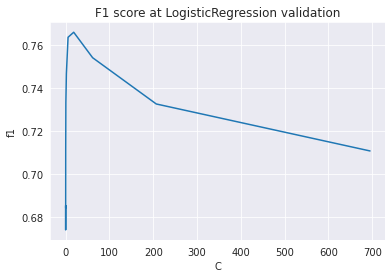

In [21]:
# подбор гиперпараметра С для LogisticRegression
# шапка таблицы для построения графика
df_c = pd.DataFrame(columns = ['С', 'f1_score'])
count = 0

for c in tqdm(np.logspace(-4, 6, num=20)[:14]):
    model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced', C=c)
    model.fit(tf_idf_train, target_train) 
    pred_val = model.predict(tf_idf_val)
    
    # заполняем таблицу гиперпараметра и метрики f1
    df_c.loc[count, 'С'] = c
    df_c.loc[count, 'f1_score'] = f1_score(target_val, pred_val)
       
    count += 1
    
# выводим метрику f1 на каждом изменении гиперпараметра C
print(df_c)

# строим график изменения f1 на валидационном наборе  
sns.set_style('darkgrid')
df_c = df_c.astype(float)
plt.figsize = (6, 12)
plt.title("F1 score at LogisticRegression validation")
sns.lineplot(x="С", y="f1_score", data=df_c).set(ylabel='f1');

*Рассмотрим значения параметра С в меньшем диапазоне, от 6 до 25, где, судя по предыдущей таблице, наивысшие значения метрики F1 на валидационной выборке.* 

  0%|          | 0/20 [00:00<?, ?it/s]

     С  f1_score
0    6  0.763514
1    7   0.76414
2    8  0.764472
3    9  0.766079
4   10  0.767561
5   11  0.767954
6   12  0.765616
7   13  0.767155
8   14  0.766801
9   15  0.765872
10  16  0.765737
11  17  0.766312
12  18  0.766619
13  19  0.765908
14  20  0.765232
15  21  0.765404
16  22  0.764383
17  23  0.763478
18  24  0.762761
19  25  0.762485


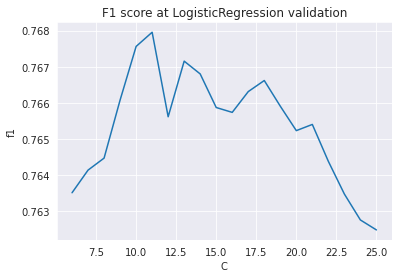

In [22]:
# подбор гиперпараметра С от 6 до 25 для LogisticRegression
# шапка таблицы для построения графика
df_c1 = pd.DataFrame(columns = ['С', 'f1_score'])
count = 0

for c in tqdm(range(6, 26)):
    model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced', C=c)
    model.fit(tf_idf_train, target_train)
    pred_val = model.predict(tf_idf_val)
    
    # заполняем таблицу гиперпараметра и метрики f1
    df_c1.loc[count, 'С'] = c
    df_c1.loc[count, 'f1_score'] = f1_score(target_val, pred_val)
       
    count += 1
    
# выводим метрику f1 на каждом изменении гиперпараметра C
print(df_c1)

# строим график изменения f1 на валидационном наборе  
df_c1 = df_c1.astype(float)
plt.figsize = (6, 12)
plt.title("F1 score at LogisticRegression validation")
sns.lineplot(x="С", y="f1_score", data=df_c1).set(ylabel='f1');    

In [23]:
# значение C при наивысшей метрике F1
df_c1[df_c1['f1_score'] == df_c1['f1_score'].max()]

,С,f1_score
5,11.0,0.767954


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, линейная регрессия очень хорошо работают с признаками, полученными из текстов. С помощью TF-IDF мы получили очень длинные разряженные вектора. И действительно, они очень длинные (длина около 140 000), при этом очень мало значений отличаются от нуля. Так вот, линейные модели гораздо лучше деревьев справляются с такими признаками и ты поступил совершенно верно, ослабив регуляризацию, что позволило модели лучше подстроитья под данные </div>

In [39]:
# сохранение модели с лучшими гиперпараметрами
best_model_regr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced', C=11) 

*Обучим модель RandomForestClassifier, передав параметр балансировки классов и подбирая гиперпараметры количества деревьев, глубины дерева и min_samples_leaf*

In [25]:
# подбор гиперпараметров в цикле для RandomForestClassifier

best_model_forest = None
best_result_f = 0
best_est = 0
best_depth = 0
best_leaf = 0

for depth in tqdm(range(10, 21)):
    for est in range(50, 251, 100):
        for leaf in range(1, 4):
    
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, 
                                           min_samples_leaf=3, class_weight='balanced')
            model.fit(tf_idf_train, target_train)
            pred_val = model.predict(tf_idf_val)
            result = f1_score(target_val, pred_val)
            
            if result > best_result_f:
                best_model_forest = model
                best_result_f = result
                best_est = est
                best_depth = depth
                best_leaf = leaf
                
print("Лучшая f1_score:", best_result_f)
print("Количество деревьев:", best_est)
print("Глубина дерева:", best_depth)
print("min_samples_leaf:", best_leaf)

  0%|          | 0/11 [00:00<?, ?it/s]

Лучшая f1_score: 0.3892524015035501
Количество деревьев: 250
Глубина дерева: 20
min_samples_leaf: 1


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

*Обучим модель DecisionTreeClassifier, передав параметр балансировки классов и подбирая гиперпараметры глубины дерева и min_samples_leaf*

In [26]:
# подбор гиперпараметров в цикле для DecisionTreeClassifier

best_model_tree = None
best_result_t = 0
best_depth = 0
best_leaf = 0
    
for depth in tqdm(range(1, 22)):
    for leaf in range(1, 12):
        
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf, class_weight='balanced')
        model.fit(tf_idf_train, target_train)
        pred_val = model.predict(tf_idf_val)
        result = f1_score(target_val, pred_val)
            
        if result > best_result_t:
            best_model_tree = model
            best_result_t = result
            best_depth = depth
            best_leaf = leaf
                
print("Лучшая f1_score:", best_result_t)
print("Глубина дерева:", best_depth)
print("min_samples_leaf:", best_leaf)

  0%|          | 0/21 [00:00<?, ?it/s]

Лучшая f1_score: 0.6119850187265918
Глубина дерева: 16
min_samples_leaf: 9


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

*Обучим модель LogisticRegression, увеличив класс 1 методом upsample до примерного равенства с классом 0 и подбирая гиперпараметр C*

In [27]:
#функция увеличения класса 1 в определённое число раз

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [28]:
# поиск параметра repeat, чтобы классы были примерно равными
for i in range(2, 11):
    features_upsampled, target_upsampled = upsample(features_train, target_train, i)
    print("Увеличение класса 1 в", i, "| Доля класса 1 в целевом признаке:",target_upsampled.value_counts(normalize=True)[1])

Увеличение класса 1 в 2 | Доля класса 1 в целевом признаке: 0.18457286539543696
Увеличение класса 1 в 3 | Доля класса 1 в целевом признаке: 0.2534676709380808
Увеличение класса 1 в 4 | Доля класса 1 в целевом признаке: 0.31162771119836924
Увеличение класса 1 в 5 | Доля класса 1 в целевом признаке: 0.36138058764790215
Увеличение класса 1 в 6 | Доля класса 1 в целевом признаке: 0.40442633952958434
Увеличение класса 1 в 7 | Доля класса 1 в целевом признаке: 0.44203559017200456
Увеличение класса 1 в 8 | Доля класса 1 в целевом признаке: 0.47517707736389686
Увеличение класса 1 в 9 | Доля класса 1 в целевом признаке: 0.5046022823165903
Увеличение класса 1 в 10 | Доля класса 1 в целевом признаке: 0.5309031007593111


In [29]:
# увеличение строк класса 1 в 9 раз для балансировки с классом 0
features_upsampled, target_upsampled = upsample(features_train, target_train, 9)

In [30]:
# перевод твитов в формат TF-IDF для увеличенного числа признаков
tf_idf_train_upsampled = count_tf_idf.transform(features_upsampled)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Нет смысла менять кодировку. Изменение кодировки увеличивает количество оперативной памяти, необходимой для хранения текстов. Но наши тексты написаны латиницей, поэтому вполне достаточно кодировки по умолчанию.</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Убрал кодировку.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

*Подберём гиперпарметр С для модели с upsampled данными, аналогично обычным данным по обучающей выборке*

  0%|          | 0/14 [00:00<?, ?it/s]

             С  f1_score
0       0.0001  0.420526
1     0.000336  0.614005
2     0.001129   0.66135
3     0.003793  0.660673
4     0.012743  0.670497
5     0.042813  0.691284
6     0.143845  0.721092
7     0.483293   0.73729
8     1.623777    0.7548
9     5.455595  0.766249
10   18.329807  0.757858
11   61.584821  0.741201
12  206.913808  0.723442
13  695.192796  0.700739


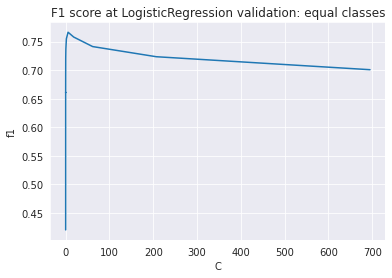

In [31]:
# подбор гиперпараметра С для LogisticRegression upsampled
# шапка таблицы для построения графика
df_c2 = pd.DataFrame(columns = ['С', 'f1_score'])
count = 0

for c in tqdm(np.logspace(-4, 6, num=20)[:14]):
    model = LogisticRegression(random_state=12345, solver='liblinear', C=c)
    model.fit(tf_idf_train_upsampled, target_upsampled) 
    pred_val = model.predict(tf_idf_val)
    
    # заполняем таблицу гиперпараметра и метрики f1
    df_c2.loc[count, 'С'] = c
    df_c2.loc[count, 'f1_score'] = f1_score(target_val, pred_val)
       
    count += 1
    
# выводим метрику f1 на каждом изменении гиперпараметра C
print(df_c2)

# строим график изменения f1 на валидационном наборе  
df_c2 = df_c2.astype(float)
plt.figsize = (6, 12)
plt.title("F1 score at LogisticRegression validation: equal classes")
sns.lineplot(x="С", y="f1_score", data=df_c2).set(ylabel='f1');

  0%|          | 0/15 [00:00<?, ?it/s]

     С  f1_score
0    1  0.747507
1    2  0.757475
2    3  0.761638
3    4  0.763143
4    5  0.766562
5    6  0.767076
6    7  0.766543
7    8  0.766055
8    9  0.764993
9   10  0.765652
10  11  0.765418
11  12  0.764298
12  13  0.762815
13  14  0.762181
14  15  0.761463


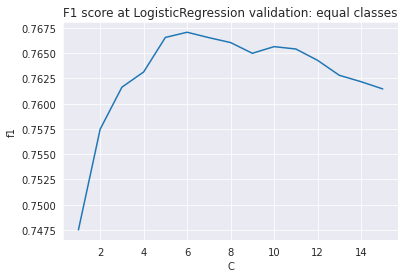

In [32]:
# подбор гиперпараметра С для LogisticRegression в дипазоне от 1 до 15
# шапка таблицы для построения графика
df_c3 = pd.DataFrame(columns = ['С', 'f1_score'])
count = 0

for c in tqdm(range(1, 16)):
    model = LogisticRegression(random_state=12345, solver='liblinear', C=c)
    model.fit(tf_idf_train_upsampled, target_upsampled)
    pred_val = model.predict(tf_idf_val)
    
    # заполняем таблицу гиперпараметра и метрики f1
    df_c3.loc[count, 'С'] = c
    df_c3.loc[count, 'f1_score'] = f1_score(target_val, pred_val)
       
    count += 1
    
# выводим метрику f1 на каждом изменении гиперпараметра C
print(df_c3)

# строим график изменения f1 на валидационном наборе  
df_c3 = df_c3.astype(float)
plt.figsize = (6, 12)
plt.title("F1 score at LogisticRegression validation: equal classes")
sns.lineplot(x="С", y="f1_score", data=df_c3).set(ylabel='f1');

In [33]:
# значение C при наивысшей метрике F1
df_c3[df_c3['f1_score'] == df_c3['f1_score'].max()]

,С,f1_score
5,6.0,0.767076


In [34]:
# сохранение модели с лучшими гиперпараметрами для LogisticRegression-upsampled
best_model_regr_up = LogisticRegression(random_state=12345, solver='liblinear', C=6) 

*Обучим модель градиентного бустинга LGBMClassifier, подбирая гиперпараметры с помощью кросс-валидации. Для этого объединим обучающую и валидационную выборки.*

In [35]:
# объединение признаков (а также целевых признаков) в обучающей и валидационной выборках
features_trainval = pd.concat([features_train, features_val])
target_trainval = pd.concat([target_train, target_val])

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Нет смысла менять кодировку. Изменение кодировки увеличивает количество оперативной памяти, необходимой для хранения текстов. Но наши тексты написаны латиницей, поэтому вполне достаточно кодировки по умолчанию.</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Здесь вообще убрал трансформацию в TF-IDF, так как далее это сделает Pipeline.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [36]:
%%time
# инициализируем Pipeline
pipeline = Pipeline(
    [
        ('tfidf', TfidfVectorizer(stop_words=stoplist)), 
        ('lgb', LGBMClassifier(random_state=12345)) 
    ]
)

# список гиперпараметров для подбора
parameters_grid = {
    'lgb__n_estimators': [50, 120, 150],
    'lgb__learning_rate': [0.1, 0.5]
}

# подбор лучшей модели LGBMClassifier
grid_lgb = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=10
)

grid_lgb.fit(features_trainval, target_trainval)

print('Лучшая F1 для LGBM: {:.4f} при значениях гиперпараметров: {}'.\
      format(grid_lgb.best_score_, grid_lgb.best_params_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START lgb__learning_rate=0.1, lgb__n_estimators=50................
[CV 1/3; 1/6] END lgb__learning_rate=0.1, lgb__n_estimators=50; total time= 2.0min
[CV 2/3; 1/6] START lgb__learning_rate=0.1, lgb__n_estimators=50................
[CV 2/3; 1/6] END lgb__learning_rate=0.1, lgb__n_estimators=50; total time= 1.9min
[CV 3/3; 1/6] START lgb__learning_rate=0.1, lgb__n_estimators=50................
[CV 3/3; 1/6] END lgb__learning_rate=0.1, lgb__n_estimators=50; total time= 2.4min
[CV 1/3; 2/6] START lgb__learning_rate=0.1, lgb__n_estimators=120...............
[CV 1/3; 2/6] END lgb__learning_rate=0.1, lgb__n_estimators=120; total time= 3.3min
[CV 2/3; 2/6] START lgb__learning_rate=0.1, lgb__n_estimators=120...............
[CV 2/3; 2/6] END lgb__learning_rate=0.1, lgb__n_estimators=120; total time= 3.5min
[CV 3/3; 2/6] START lgb__learning_rate=0.1, lgb__n_estimators=120...............
[CV 3/3; 2/6] END lgb__learning_rate=

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Поиск по сетке использует крос-валидацию.  А кросс-валидация одновремено с извлечением признаков из текстов требует особого подхода. Ты помнишь, что векторайзер мы обучали на обучающей выборке а применяли к тестовой и валидационной. Что происходит при кросс-валидации? Ты разбиваешь большую обучающую выборку на несколько фолдов, из них выделяешь часть на обучение, часть на валидацию.  Но признаки (TF-IDF) уже обучены на всем наборе (обучающий + валидационный). Получается утечка данных. Чтобы избежать её нужно использовать pipeline из векторайзера и модели.
    
Пример такого пайплайна можно посмотреть в официальной документации
    
  https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_text_feature_extraction.html
    
И еще полезные материалы:
    
  https://newtechaudit.ru/pipeline-v-rabote-s-dannymi/      
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Да, отличный метод. Применил.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> Снимаю шляпу ))) </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Огромное количество экспериментов и подходов. Молодец, прими искреннее восхищение.</div>

## Выводы

In [37]:
# сведём оптимальные метрики f1 для разных моделей в таблицу

df_best = pd.DataFrame(columns = ['model', 'f1'])
df_best.loc[0] = ['DecisionTreeClassifier', best_result_t]
df_best.loc[1] = ['RandomForestClassifier', best_result_f]
df_best.loc[2] = ['LogisticRegression - balanced', df_c1['f1_score'].max()]
df_best.loc[3] = ['LogisticRegression - upsampled', df_c3['f1_score'].max()]
df_best.loc[4] = ['LGBMClassifier', grid_lgb.best_score_]
df_best

,model,f1
0,DecisionTreeClassifier,0.611985
1,RandomForestClassifier,0.389252
2,LogisticRegression - balanced,0.767954
3,LogisticRegression - upsampled,0.767076
4,LGBMClassifier,0.758559


*По результатом обучения и проверки данных на валидационной выборке (кросс-валидации для LGBMClassifier) наивысшие метрики F1 у моделей LogisticRegression и LGBMClassifier. Для финального тестирования выберем модель LogisticRegression со сбалансированными классами как модель с чуть  большей метрикой F1, чем у LGBMClassifier.*

In [40]:
# перевод обучающе-валидационной и тестовой выборок в формат TF-IDF для тестирования LogisticRegression
tf_idf_trainval = count_tf_idf.transform(features_trainval)
tf_idf_test = count_tf_idf.transform(features_test)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Нет смысла менять кодировку. Изменение кодировки увеличивает количество оперативной памяти, необходимой для хранения текстов. Но наши тексты написаны латиницей, поэтому вполне достаточно кодировки по умолчанию.</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Убрал кодировку. Добавил строку с трансформацией обучающей и валидационной выборок в TF-IDF, так как выбрана LogisticRegression для финального тестирования.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [41]:
# обучение лучшей LogisticRegression на обучающем+валидационном наборах
best_model_regr.fit(tf_idf_trainval, target_trainval)

# предсказание на тестовом наборе
pred_test = best_model_regr.predict(tf_idf_test)

# расчёт метрики F1 на тестовой выборке
f1_final = f1_score(target_test, pred_test)

print('Метрика F1 у модели LogisticRegression на тестовой выборке: {:.4f}'.format(f1_final))

Метрика F1 у модели LogisticRegression на тестовой выборке: 0.7622


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец: 
    
  - выбрана лучшая модель
  - тестирование произведено корректно 
  - достигнута хорошая точность на тестовой выборке
</div>


**Общий вывод**

*В данных интернет-магазина собрано около 159 тыс. твитов различного содержания, классифицированных как нейтрально-положительные (значение 0) и токсично-негативные (значение 1). Целью исследования являлось построение модели классификации комментария на положительный или отрицательный. Для реализации данной цели были решены следующие задачи:*


 1. **Подготовка данных для модели**
 
 
 2. **Обучение моделей**
 
 
 3. **Финальное тестирование модели**
 
 
 
 **Задача 1 "Подготовка данных для модели"** 

*Базу данных из более 159 тыс. текстовых твитов на английском языке (без пропусков данных и дубликатов) необходимо было преобразовать в цифровой формат. Для этого проведена предварительная работа по очистке текстов от всех символов, кроме английских букв как составной части слов и апострофа как важного элемента сокращения английских выражений.*

*Затем все слова были лемматизированы (приведены к начальной форме) с помощью лемматизатора WordNet. Лемматизация проведена с учётом определения, к какой части речи относится слово.*

*В данных выделен признак (лемматизированные твиты) и целевой признак (тип комментария) с последующим разбиением на выборки:*

    - обучающая (80% данных)
    - валидационная (10% данных)
    - тестовая (10% данных)
    
*Во всех выборках практически одинаковый баланс классов: 90% положительных комментариев и 10% отрицательных.*

*Наконец, обучающая и тестовая выборки преобразованы в цифровые данные: каждое слово классифицировано по важности (частоте) с помощью величины TF-IDF. При этом малозначимые слова (стоп-слова) типа предлогов, союзов и местоимений исключены из выборки.*



**Задача 2 "Обучение моделей"** 

*Обучены следующие типы моделей (с подбором гиперпараметров) и получены соответствующие значения метрики F1:*

    - DecisionTreeClassifier: метрика F1 - 0.61 на валидационной выборке
    - RandomForestClassifier: метрика F1 - 0.39 на валидационной выборке
    - LogisticRegression-сбалансированные классы: метрика F1 - 0.768 на валидационной выборке
    - LogisticRegression-увеличение объектов с меньшим классом: метрика F1 - 0.767 на валидационной выборке
    - LGBMClassifier: метрика F1 - 0.759 на кросс-валидации

*Модели LogisticRegression и LGBMClassifier достигли целевого значения метрики F1 в 0.75. Можно определить эти модели как подходящие для обработки текстов.*  


**Задача 2 "Финальное тестирование модели"** 

*Для финального тестирования выбрана модель LogisticRegression со сбалансированными классами как модель с наибольшим значением метрики F1. На тестовой выборке данная модель показала практически идентичный результат метрики (0.762) по сравнению с обучающей выборкой, что позволило преодолеть порог (трешхолд проекта - 0.75) и рекомендовать эту модель для использования в классификации комментариев на положительные и отрицательные.* 
    

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Отличная, очень объемная работа. Ты провел предобработку текста и хорошо справился с лемматицией и векторизацией. В обучении моделей ты показал весь спектр используемых техник и понимание роли выборок.
    
Единственный момент, который нужнодоработать  не стоит перекодировать английский текст в Юникод.

Желтые комментарии на твое усмотрение, хотя разобраться с тем,что такое Pipeline крайне полезно.
     
Жду твоих исправлений :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Вижу что ты доработал проект и теперь он может быть принят.
    
Отдельный рекспект за Pipline.
    
Проект принят. Поздравляю и желаю дальнейших успехов!    
</div>